# Introducción a la visualización de datos: Distribuciones


**Distribuciones de Datos**

Si tomamos el valor mínimo y el valor máximo de nuestro conjunto de datos tenemos el rango dentro del cual están contenidos todos nuestros datos. Pero dentro de ese rango los valores pueden estar distribuidos de muchas maneras distintas. A veces están muy cerca del valor mínimo, a veces están muy cerca del valor máximo; a veces se amontonan casi todos alrededor de la mediana y sólo unos pocos toman los valores extremos; a veces generan incluso dos "montículos" alrededor de los cuales se concentran la mayoría de los datos. Hay muchísimas posibilidades.

Usando valores individuales es imposible tener una idea general de nuestro conjunto y es por eso que solemos utilizar algunas técnicas que toman en cuenta todo el conjunto de datos al mismo tiempo. Hoy vamos a aprender cómo a través de la visualización de datos podemos darnos una idea mucho más precisa de cómo están organizados los datos en nuestro conjunto.

**Boxplots**

Los Boxplots (o diagramas de caja) son una manera de visualizar nuestros datos de forma que la organización de los percentiles se haga muy evidente.

Los Boxplots nos ayudan a discernir si nuestros datos están sesgados (si tienen una tendencia), si están dispersos o agrupados y si existen valores atípicos con valores extremos.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: xlabel='price'>

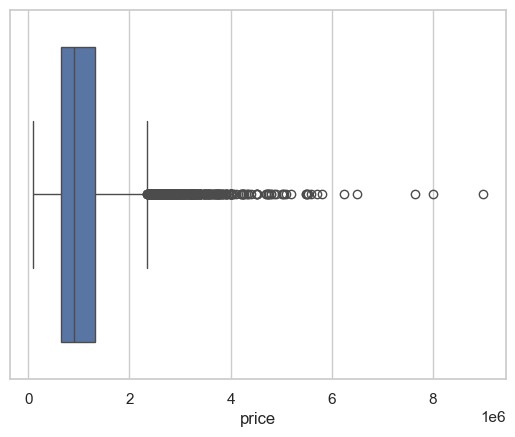

In [3]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

- La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
- La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
- Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
- Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.

Como puedes ver, esta gráfica nos da muchísima información muy útil.

- Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
- Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
- También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Vamos a ver qué pasa si graficamos una línea vertical justo donde está el promedio de nuestros datos. Para esto vamos a usar matplotlib, otra librería de visualizaciones de datos que aprenderemos a detalle más adelante:

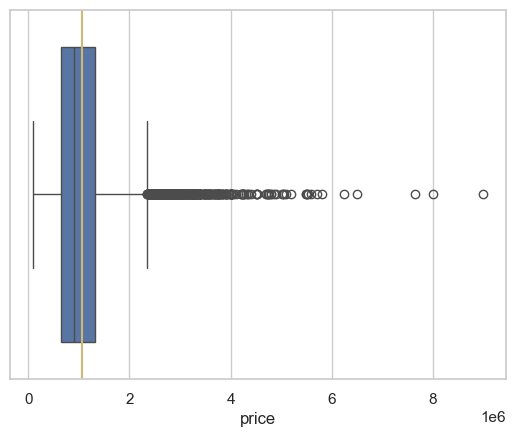

In [5]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y')

Como puedes ver, a pesar de los valores atípicos tan extremos, tenemos tantos valores en el rango menor de nuestros datos que el promedio queda bastante cercano a la mediana.

Los valores atípicos pueden significar múltiples cosas:

- A veces son errores de medición
- A veces son errores humanos de transcripción
- Podrían ser simplemente anomalías naturales causadas por fenómenos aleatorios
- O podrían tener un significado más profundo: por ejemplo, la riqueza de alguien como Carlos Slim es una anomalía en este país, pero que es un indicador de desigualdad muy fuerte que nos da información útil acerca de la distribución de la riqueza

Decidir cómo lidiar con estos valores atípicos (si eliminarlos o dejarlos) depende totalmente del contexto.

Dado que nuestro análisis de este conjunto aún no es muy profundo, por el momento vamos a asumir la posición de eliminar estos datos, solamente para ver cómo se haría este proceso.

### Rango Intercuartílico y valores atípicos

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el **Score de Rango Intercuartílico (IQR-Score)**. De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).

In [6]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inferior = df['price'] > df['price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['price'] < df['price'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

<Axes: ylabel='price'>

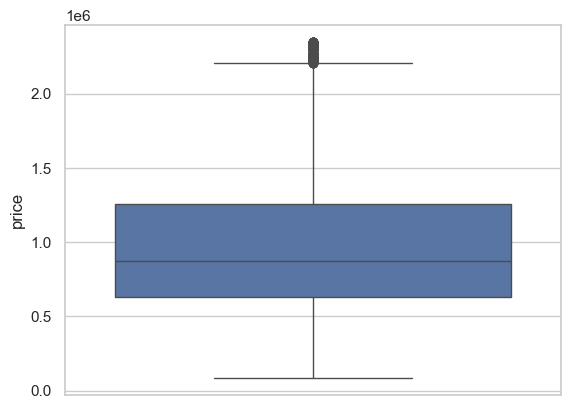

In [7]:
sns.boxplot(df_filtrado['price'])

**Tabla de frecuencias**

Los percentiles segmentan nuestros datos en segmentos de distinto tamaño en los que tenemos el mismo número de muestras. En cambio, las tablas de frecuencias segmentan nuestros datos en segmentos que miden lo mismo pero que contienen una cantidad distinta de muestras.

Esto puede darnos otra perspectiva de nuestros datos que también resulta muy útil. Vamos a aprender a generar una tabla de frecuencias usando pandas.

In [8]:
prices = df['price']
prices.max() - prices.min()

np.float64(8915000.0)

Tomando en cuenta nuestro rango, vamos a decidir dividir nuestro conjunto en 20 segmentos. Usemos ahora nuestro método `cut` para segmentar nuestros datos.

In [9]:
pd.cut(prices, 20)

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64, right]): [(76085.0, 530750.0] < (530750.0, 976500.0] < (976500.0, 1422250.0] < (1422250.0, 1868000.0] ... (7217000.0, 7662750.0] < (7662750.0, 8108500.0] < (8108500.0, 8554250.0] < (8554250.0, 9000000.0]]

Ok... ¿Qué acaba de suceder? `pd.cut` toma el rango completo de nuestros datos, y luego crea 20 segmentos de igual tamaño. Después, revisa uno por uno nuestros datos, los ubica en uno de los segmentos y nos regresa una `Serie` donde tenemos cada índice clasificado en el segmento que lo toca.

Ahora, para dividir nuestro dataset por segmentos, podemos utilizar `pd.groupby` y pasarle la `Serie` que obtuvimos. Lo que hace `groupby` en este caso es leer la clasificación de cada índice y agruparlos de manera que todas las muestras que pertencen a la misma clasificación queden juntas.

Después de agruparlos, podemos usar un `count` para saber cuántas muestras hay en cada grupo:

In [10]:
segmentos = pd.cut(prices, 20)

df['price'].groupby(segmentos).count()

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/3408492839.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['price'].groupby(segmentos).count()


price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

¡Y Listo! Tenemos una tabla donde los índices son los 20 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver varios segmentos donde la cantidad de muestras es muy baja.

Ésta podría ser aún otra manera de eliminar valores atípicos, ya que podríamos, por ejemplo, decidir eliminar todos los datos que se encuentran en segmentos con menos de 50 muestras.

**Histogramas**

Los histogramas son una manera de visualizar nuestras tablas de frecuencias.

El eje x es el rango de nuestros datos y se divide por segmentos (como los que generamos en el Ejemplo pasado).

El eje y indica el conteo de muestras en cada segmento.

<Axes: xlabel='price', ylabel='Count'>

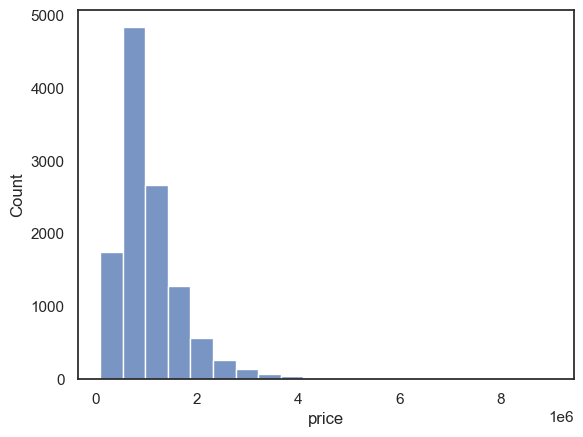

In [22]:
sns.set_theme(style='white')
sns.histplot(df['price'], kde=False, bins=20)

- La bandera `kde=False` evita que se grafique también la densidad de probabilidad (que veremos más adelante).
- `bins=20` indica el número de segmentos.

Esta gráfica indica con mucha claridad hacia donde "tienden" nuestros datos, ¿no es así?

Podemos ver mucha más granularidad incluso si aumentamos el tamaño de nuestros `bins`:

<Axes: xlabel='price', ylabel='Count'>

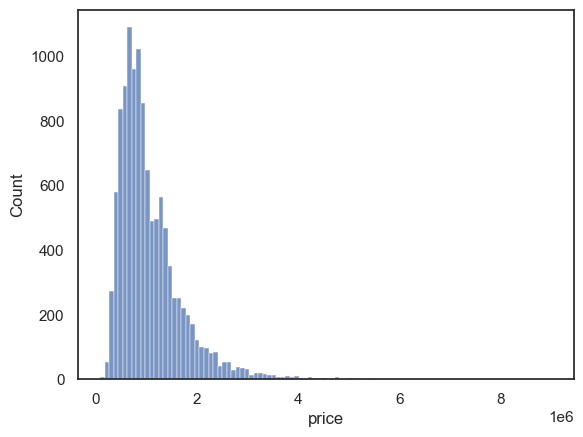

In [23]:
sns.set_theme(style='white')
sns.histplot(df['price'], kde=False, bins=100)

Vamos a ver algunas formas comunes que pueden tener nuestros histogramas. Normalmente las gráficas que obtengamos con datos provenientes del mundo real no encajan a la perfección con estas formas, pero ayuda tener referencias para poder describir nuestras gráficas.

Solemos describir nuestros datos utilizando dos parámetros: asimetría y curtosis.

**Asimetría (skewness)**

La asimetría nos da una medida de la falta de simetría en una distribución (duh). Una distribución es simétrica si se ve igual a la izquierda y derecha del punto central.

- Una asimetría de 0 indica que la simetría de la distribución es perfecta.

- Números positivos indican que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda.

- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

**Curtosis (kurtosis)**

La curtosis es una medida de la dispersión de nuestros datos. La curtosis nos dice qué tan escarpada o achatada está nuestra distribución.

- Curtosis de 0 indica que la dispersión de nuestros datos es normal (más adelante aprenderemos exactamente qué significa esto).

- Curtosis positiva indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos, que están más lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).

- Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).

No todas las técnicas para medida curtosis establecen la normalidad en 0, pero nosotros vamos a utilizar la default en `scipy` y `pandas`.

---

Para calcular las medidas de curtosis y asimetría usaremos los métodos `kurtosis` y `skew` de la librería `scipy.stats`.

Usando estas definiciones estamos listos para visualizar algunas distribuciones con características distintas:

**Distribución Normal (Standard Normal)**

La distribución normal es una de las más famosas y más utilizadas. Muchos de los análisis estadísticos que hacemos toman a la distribución normal como un "estándar". Hay algunas medidas que incluso requieren que la distribución sea normal para funcionar. A través de este módulo nos toparemos varias veces con esta distribución y la exploraremos más a profundidad. Por el momento basta saber que la distribución normal tiene una asimetría de 0 y una curtosis de 0 (usando el método default de `scipy` y `pandas`.

Otra cosa interesante es que la distribución normal estándar tiene un promedio de 0, una mediana de 0, una moda de 0 y una desviación estándar de 1. Esto implica que el 68% de los datos están a 1 desviación estándar de la media y el 95% de los datos están a 2 desviaciones estándares de la media.

Esta distribución se ve así:

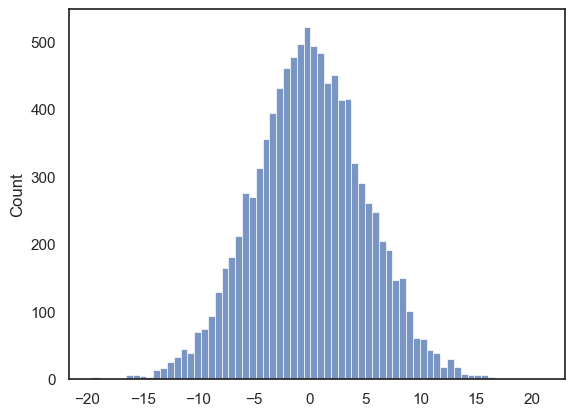

In [29]:
normal = np.random.normal(loc=0, scale=5, size=10000)
sns.histplot(normal, kde=False);

In [30]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: 0.03699613641572874
Asimetría: -0.00858108441118737


**Distribuciones de cola corta (short-tailed)**

Las distribuciones de cola corta se concentran mucho en el punto central y casi no se extienden hacia los lados. Es raro en realidad encontrar distribuciones de cola corta, pero así se vería una:

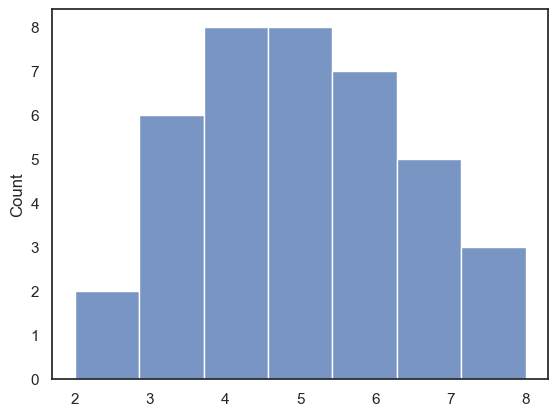

In [31]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

sns.histplot(cola_corta, kde=False, bins=7);

In [32]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


**Distribuciones de cola larga (fat-tailed)**

Estas distribuciones se extienden mucho hacia los lados (o hacia uno de los dos lados) a partir del punto central. Muchos fenómenos naturales y sociales tienen distribuciones de cola larga.

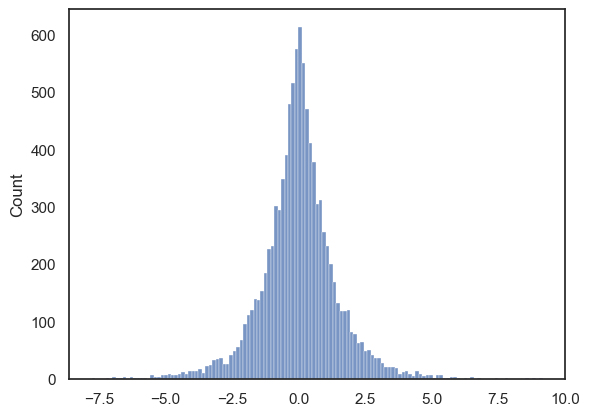

In [33]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

sns.histplot(cola_larga, kde=False);

In [34]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 3.086505669176213
Asimetría: -0.016730553346593877


**Asimetría Positiva (right-skewed)**

Las distribuciones con asimetría positiva tienen colas más largas hacia el lado derecho del punto central.

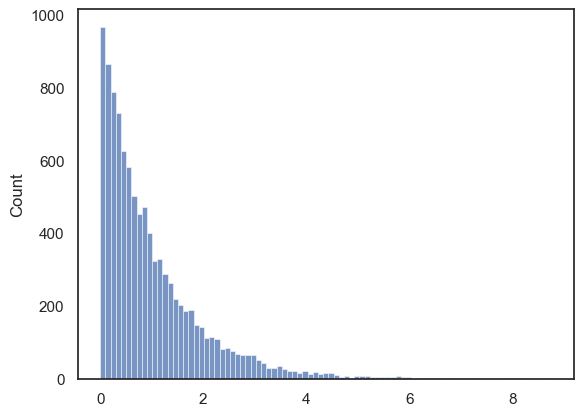

In [36]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

sns.histplot(asimetria_positiva, kde=False);

In [37]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 5.1684975812068235
Asimetría: 1.9369035202959577


**Asimetría negativa (left-skewed)**

Las distribuciones con asimetría negativa tienen colas más largas hacia el lado izquierdo del punto central.

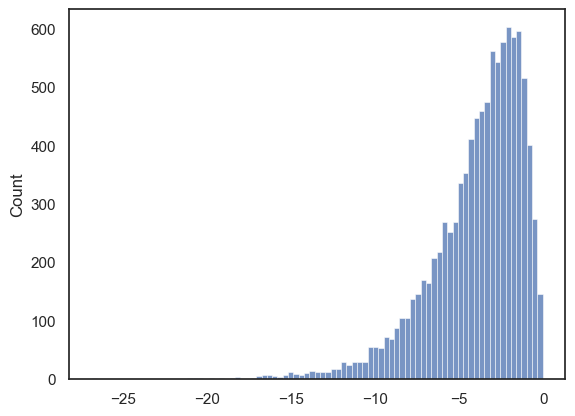

In [38]:
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

sns.histplot(asimetria_negativa, kde=False);

In [39]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 3.0978497347950613
Asimetría: -1.433013226754498


Hay algunas distribuciones que tienen valores muy extremos tanto de curtosis como de asimetría:

AttributeError: Rectangle.set() got an unexpected keyword argument 'norm_hist'

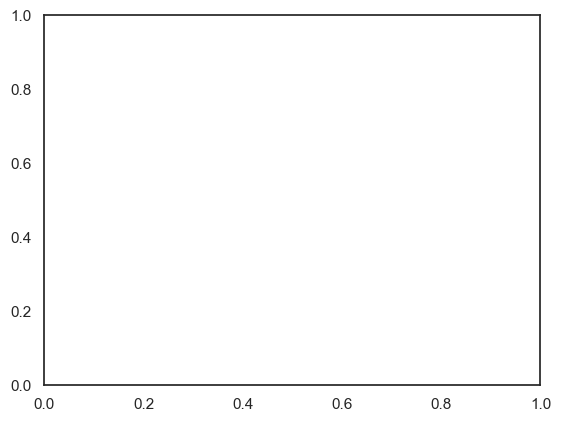

In [42]:
cauchy = np.random.standard_cauchy(size=10000)

sns.histplot(cauchy, kde=False, norm_hist=False);